In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import shielded_molecules as sm
import numpy.typing as npt

DATA_PATH = "../data"

In [2]:
C12 = 1.112e7
C6 = -1381.
GHZ = 1.51982850071586e-7
KELVIN = 3.1668105e-6

In [3]:
def potential(r: float):
    return np.array([[C12 / r**12 + C6 / r**6]])

levels = [(0, 0)]
entrance = 0
pot = sm.NumpyPotential(1, potential)

params = sm.SystemParams(levels, entrance, pot, 6.015122 / 2. * 1822., 1e-7 * KELVIN)
problem = sm.Problem(params, 4., 20., 500.)
problem.step_rule(1e-3, 1., 500)

bounds = problem.bound_states((-500 * GHZ, 0.), 1e-7 * GHZ)
for b in bounds:
    print(b.nodes, b.energy / GHZ)

23 -270.62728655520476
24 -57.33859070051384
25 -1.75027140278859


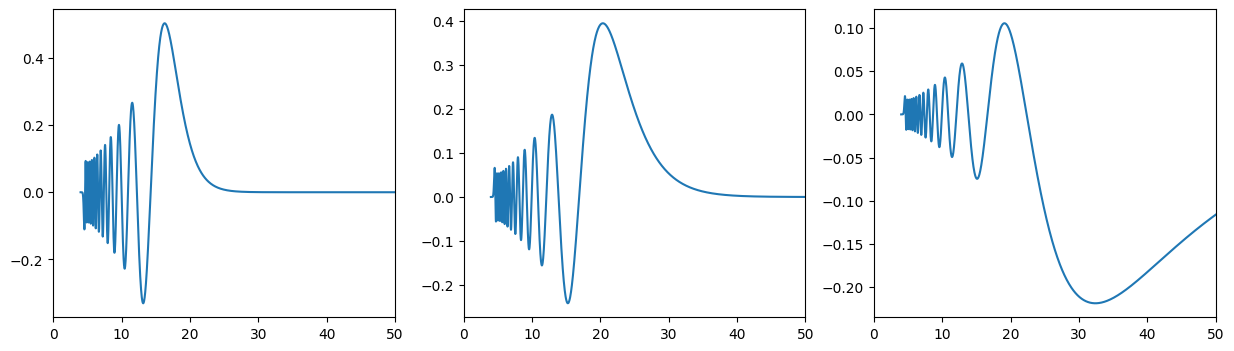

In [4]:
fig, axes = plt.subplots(1, 3, figsize = (15, 4))

(r, values) = problem.wave_function(bounds[0])
values = np.array(values)
axes[0].plot(r, values)
axes[0].set_xlim(0, 50)

(r, values) = problem.wave_function(bounds[1])
values = np.array(values)
axes[1].plot(r, values)
axes[1].set_xlim(0, 50)

(r, values) = problem.wave_function(bounds[2])
values = np.array(values)
axes[2].plot(r, values)
axes[2].set_xlim(0, 50);